# NLP Challenge: IMDB Dataset of 50K Movie Reviews (Sentiment Analysis)


### 1. Importing Libraries

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. Loading Dataset

In [3]:
movie_df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

### 2.1 Dataset Dimensions

In [4]:
row, col = movie_df.shape
print("Rows: ", row, " and Columns: ", col)

Rows:  50000  and Columns:  2


### 2.2 Dataset Preview

In [5]:
movie_df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### 2.3 Distribution of Positive & Negative Sentiments [Pie Chart]

Text(0.5, 1.0, 'Positive & Negative Sentiments')

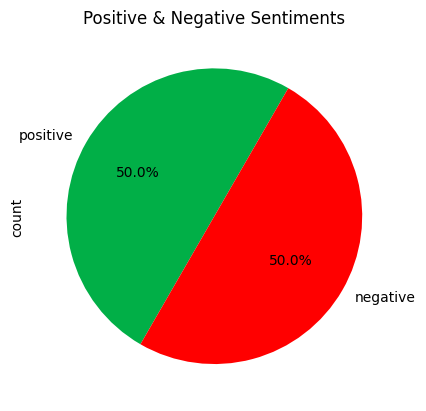

In [6]:
colors = ["#01af47", "red"]

movie_df["sentiment"].value_counts().plot(
    kind="pie", 
    colors=colors, 
    autopct='%1.1f%%',
    startangle=60,
    fontsize=10
)

plt.title("Positive & Negative Sentiments")

### 3. Cleaning Dataset

Purpose of `clean_text_alternative` method:
- Converts the given review text to **lowercase characters**
- I used `maketrans()` for faster removal of **punctuation**, removed **digits** by filtering through the characters, removing **emojis** using `regex`
and used `.split()` for tokenizing the stopwords

In [7]:
# defining all stopwords
stop_words = set(stopwords.words("english"))

# Source: StackOverflow
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def clean_text_alternative(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([char for char in text if not char.isdigit()])
    text = emoji_pattern.sub(r'', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

### 3.1 Testing Clean Text Function

In [8]:
my_test_review = "[1]WOW😍😍 That was the best movie I watched!!! I recommend everyone to watch it. #FireMovie #LIONELMESSI10"

print(clean_text_alternative(my_test_review))

wow best movie watched recommend everyone watch firemovie lionelmessi


### 3.2 Applying to Dataset

In [9]:
movie_df['cleaned_text'] = movie_df['review'].apply(clean_text_alternative)
movie_df.head(10)

,review,sentiment,cleaned_text
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
5,"Probably my all-time favorite movie, a story o...",positive,probably alltime favorite movie story selfless...
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,negative,encouraged positive comments film looking forw...
9,If you like original gut wrenching laughter yo...,positive,like original gut wrenching laughter like movi...


### 4. Vectorizing Review Text Data

### 4.1 Perform Count Vectorization

In [10]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(movie_df['cleaned_text'])

# Labels
y = movie_df['sentiment']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=1)

# Model: MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Count Vectorization Accuracy:", accuracy)
print("Count Vectorization Classification Report:")
print(classification_report(y_test, y_pred))

Count Vectorization Accuracy: 0.8631
Count Vectorization Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      5044
    positive       0.88      0.84      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### 4.2 Performing TF-IDF Vectorization

In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(movie_df['cleaned_text'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1)

# Model: Logistic Regression with adjusted max_iter
log_reg_model2 = LogisticRegression(max_iter=2000)
log_reg_model2.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = log_reg_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("TF-IDF Accuracy:", accuracy)
print("TF-IDF Classification Report:")
print(classification_report(y_test, y_pred))

TF-IDF Accuracy: 0.8921
TF-IDF Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      5044
    positive       0.88      0.91      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Conclusion

In this project, we explored the use of NLP techniques to classify sentiments from IMDB movie reviews. 

By applying methods like Count Vectorization and TF-IDF, and training models like Multinomial Naive Bayes and Logistic Regression, we achieved robust classification performance.

Logistic Regression combined with TF-IDF delivered the best results with an accuracy of 89.2%. This project highlights the significance of data preprocessing and feature extraction.